In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/beans/bespoke')

from constants import *
from imports import *
from traj_utils import *

In [2]:
AUX_PROPS

['speed',
 'has_map',
 'has_route',
 'pitch',
 'yaw',
 'tire_angle',
 'pos_x',
 'pos_y',
 'heading',
 'has_stop',
 'stop_dist',
 'has_lead',
 'lead_dist',
 'lead_speed',
 'should_yield',
 'dagger_shift',
 'lane_width',
 'rd_is_lined',
 'interesting_note',
 'frame_to_model_duration',
 'loop_duration',
 'num_sats',
 'gps_qual',
 'unc_p',
 'shadow_strength',
 'directionality_mult',
 'maps_noise_mult',
 'roll_noise_mult',
 'te',
 'traj_max_angle_p',
 'ccs_p',
 'tire_angle_loss',
 'tire_angle_p',
 'left_turn',
 'right_turn',
 'ego_in_intx',
 'curvature_at_ego',
 'tire_angle_ap',
 'tire_angle_p_no_rc',
 'sss_p']

In [2]:
get_target_wp_dist(0)

2.7

In [3]:
mph_to_mps(10)

4.4704

In [18]:
%%time
get_obs_per_sec()

CPU times: user 2.35 ms, sys: 0 ns, total: 2.35 ms
Wall time: 2.09 ms


(53.5, 4.48)

In [5]:
%%time
sorted(glob.glob(f"{BLENDER_MEMBANK_ROOT}/dataloader_01/run_1275/aux/*"))

CPU times: user 893 µs, sys: 374 µs, total: 1.27 ms
Wall time: 1.27 ms


['/media/ssd2/blender_membank_frameskip/dataloader_01/run_1275/aux/1.npy',
 '/media/ssd2/blender_membank_frameskip/dataloader_01/run_1275/aux/10.npy',
 '/media/ssd2/blender_membank_frameskip/dataloader_01/run_1275/aux/100.npy',
 '/media/ssd2/blender_membank_frameskip/dataloader_01/run_1275/aux/101.npy',
 '/media/ssd2/blender_membank_frameskip/dataloader_01/run_1275/aux/102.npy',
 '/media/ssd2/blender_membank_frameskip/dataloader_01/run_1275/aux/103.npy',
 '/media/ssd2/blender_membank_frameskip/dataloader_01/run_1275/aux/104.npy',
 '/media/ssd2/blender_membank_frameskip/dataloader_01/run_1275/aux/105.npy',
 '/media/ssd2/blender_membank_frameskip/dataloader_01/run_1275/aux/106.npy',
 '/media/ssd2/blender_membank_frameskip/dataloader_01/run_1275/aux/107.npy',
 '/media/ssd2/blender_membank_frameskip/dataloader_01/run_1275/aux/108.npy',
 '/media/ssd2/blender_membank_frameskip/dataloader_01/run_1275/aux/109.npy',
 '/media/ssd2/blender_membank_frameskip/dataloader_01/run_1275/aux/11.npy',
 '/

In [5]:
for i in range(10_000):
    print(f"Obs per sec {get_obs_per_sec()[0]} || render time {get_render_time()[0]} || init time {get_init_time()[0]}" )
    time.sleep(60*1)

Obs per sec 41.85 || render time 43.61 || init time 11.27
Obs per sec 44.66 || render time 44.76 || init time 4.99
Obs per sec 43.88 || render time 45.84 || init time 12.28
Obs per sec 43.78 || render time 42.85 || init time 5.21
Obs per sec 46.72 || render time 41.58 || init time 10.49
Obs per sec 40.47 || render time 46.57 || init time 6.98
Obs per sec 44.21 || render time 46.74 || init time 10.52
Obs per sec 36.26 || render time 49.68 || init time 5.24
Obs per sec 41.6 || render time 48.88 || init time 11.34
Obs per sec 41.94 || render time 43.76 || init time 5.73
Obs per sec 45.09 || render time 43.01 || init time 6.64
Obs per sec 45.45 || render time 44.27 || init time 9.32
Obs per sec 46.13 || render time 41.75 || init time 10.26
Obs per sec 46.86 || render time 41.13 || init time 6.28
Obs per sec 49.13 || render time 40.28 || init time 9.15
Obs per sec 43.46 || render time 42.69 || init time 5.27
Obs per sec 40.93 || render time 45.57 || init time 6.75
Obs per sec 41.62 || rende

KeyboardInterrupt: 

In [8]:
# Shut down trainer
set_trainer_should_stop(True)

In [12]:
t = torch.randn((3,4))
t[0][0] = torch.nan

In [13]:
t.dtype

torch.float32

In [14]:
torch.clamp(t, -10, 10)

tensor([[    nan, -1.5429,  0.1730,  0.5194],
        [ 0.1227,  0.5840, -0.0233,  1.5951],
        [ 0.2951,  0.9193,  0.8300,  0.7739]])

In [16]:
(t > 0) & (t < 2)

tensor([[False, False,  True,  True],
        [ True,  True, False,  True],
        [ True,  True,  True,  True]], device='cuda:0')

In [6]:
~(t>0)*t

tensor([[    nan,  0.0000, -0.7175,  0.0000],
        [-0.2323, -1.4721,  0.0000, -0.9467],
        [-0.7206,  0.0000, -0.6977,  0.0000]])

In [9]:
a = np.random.randn(3,5)
a

array([[ 0.44152985,  1.50411513,  1.64095077,  1.08528706, -0.51119565],
       [ 0.4556369 , -0.88712186, -0.34905381, -0.43379577, -0.94362929],
       [ 0.98571363, -0.00241864, -1.10698085, -0.74286705, -0.17467991]])

In [11]:
(0 < a) & (a<1)

array([[ True, False, False, False, False],
       [ True, False, False, False, False],
       [ True, False, False, False, False]])

In [28]:
# Shut down loader
#set_loader_should_stop(True)

In [11]:
# Shut down datagen
set_should_stop(True)

In [12]:
%%time

# Delete blender membank
os.system(f"rm -r {BLENDER_MEMBANK_ROOT}/*")

CPU times: user 732 µs, sys: 0 ns, total: 732 µs
Wall time: 231 ms


0

In [23]:
moving_average(np.array([0,1.1,2,3.5,4.9,5,6,7,8,9,10,11,12,13]),w=5)

array([ 0.  ,  1.1 ,  2.3 ,  3.3 ,  4.28,  5.28,  6.18,  7.  ,  8.  ,
        9.  , 10.  , 11.  , 12.  , 13.  ])

In [12]:
import math
original_angle = .03
road_roll = .03
new_angle = original_angle - math.atan(road_roll)
new_angle

8.995143122098731e-06

In [13]:
math.atan(.1)

0.09966865249116204

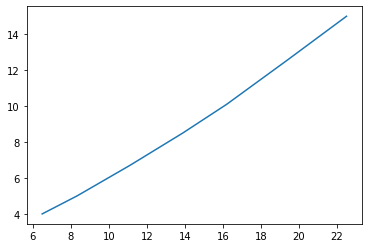

In [34]:
min_dist_lookup = [ 
    (6.5, 4.), # 14.5 mph
    (8.33, 5.0), #18 mph (speed mps, wp dist m)
    (11.11, 6.7), # 24 mph
    (13.89, 8.5), # 30 mph
    (16.2, 10.1), # 36 mph
    (19.44, 12.6), # 43 mph
    (22.5, 15.), # 50 mph
]

min_dist_bps = [x[0] for x in min_dist_lookup]
min_dist_vals = [x[1] for x in min_dist_lookup]

plt.plot(min_dist_bps, min_dist_vals)


In [ ]:
min_dist_lookup = [ # 3.29
    (6.5, 4.), # 14.5 mph
    (8.33, 5.1), #18 mph (speed mps, wp dist m)
    (11.11, 6.5), # 24 mph
    (13.89, 8), # 30 mph
    (16.2, 9.3), # 36 mph
    (19.44, 11.5), # 43 mph
    (22.5, 13.5), # 50 mph
]

In [7]:
np.tan(.5)

0.5463024898437905

In [54]:
tire_angle = .4
WHEELBASE = 1.8 #2.66
speed = mph_to_mps(10)

curvature = tire_angle/WHEELBASE # rad/m 
vehicle_turn_rate_sec = curvature * speed # rad/sec
future_vehicle_heading = vehicle_turn_rate_sec * .05
future_vehicle_heading

0.04967111111111111

In [55]:
dist_car_travelled_during_lag = speed / 20.
dist_car_travelled_during_lag

0.22352

In [56]:
r = dist_car_travelled_during_lag / future_vehicle_heading # radius of the circle around which ego is turning m/rad
r

4.5

In [57]:
# correct way
future_vehicle_y = np.sin(future_vehicle_heading)*r
future_vehicle_x = r - (np.cos(future_vehicle_heading)*r)
future_vehicle_x, future_vehicle_y

(0.005550102127081402, 0.22342809919549694)

In [58]:
a = future_vehicle_heading/2
x = dist_car_travelled_during_lag*np.cos(a)
y = (dist_car_travelled_during_lag*np.sin(a))
x, y

(0.2234510694365123, 0.005550672723098684)

In [11]:
4/6.5

0.6153846153846154

In [19]:
ACCELERATION_DUE_TO_GRAVITY = 9.8
roll = .03
sf = 1/401
u = 20

m = 1700
l = 2.66
aF = l * .41
aR = l - aF
tire_stiffness_factor = .677
cF, cR = tire_stiffness_factor, tire_stiffness_factor
sf = m * (cF*aF - cR*aR) / (l**2 * cF * cR)

In [22]:
(cF*aF - cR*aR)

-0.3241476

In [20]:
sf

-169.92259081973765

In [21]:
roll_compensation = (ACCELERATION_DUE_TO_GRAVITY * roll) / ((1 / sf) - u**2)
#roll_compensation = (ACCELERATION_DUE_TO_GRAVITY * roll) / u**2
roll_compensation

-0.0007349891864115468

In [197]:
roll_compensation_angles = CRV_WHEELBASE * roll_compensation
roll_compensation_angles

0.0019551

In [198]:
from traj_utils import *
tire_angles_to_max_speeds(.02), tire_angles_to_max_speeds(.02-roll_compensation_angles)

(14.18929668510425, 14.934187811096537)

In [3]:
# set lr
set_lr(1e-4)

In [37]:
dataloader_root = f"{BLENDER_MEMBANK_ROOT}/dataloader_06"
current_run = np.load(f"{dataloader_root}/run_counter.npy")[0]
current_run

40